In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import sys
from IPython.display import display, Markdown
from ipywidgets import interactive, Select, Dropdown
%matplotlib inline

In [2]:
%matplotlib inline

In [3]:
sys.path.append(".")
from plotter import scatter_plot_color, is_datetime

In [ ]:
iris = datasets.load_wine()
df_iris = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]],
    columns=iris["feature_names"] + ["target"],
)
converter = {0: "setosa", 1: "versicolor", 2: "virginica"}
df_iris["target"] = df_iris["target"].replace(converter)
df_iris.head()

In [ ]:
# Make an updateable plot structure
xas_widget = Select(
    options=list(df_iris.columns),
    description='x-axis',
    value=df_iris.columns[0]
)
yas_widget = Select(
    options=list(df_iris.columns),
    description='y-axis',
    value=df_iris.columns[1]
)
color_widget = Dropdown(
    options=list(df_iris.columns),
    description='coloring',
    value='target'
)

def update_plot(**kwargs):
    f, ax = plt.subplots()
    plt.ion()
    xas = xas_widget.value
    yas = yas_widget.value
    coloring = color_widget.value
    scatter_plot_color(
        f,
        ax,
        df_iris,
        xas,
        yas,
        coloring,
    )
    
interactive(
    update_plot,
    xas=xas_widget,
    yas=yas_widget,
    coloring=color_widget
)

# Time series

In [4]:
df = pd.read_csv('http://bit.ly/30iosS6', parse_dates=['date'])
df.head()

dau       date
0  672 2019-01-01
1  705 2019-01-02
2  538 2019-01-03
3  745 2019-01-04
4  514 2019-01-05

<AxesSubplot:>

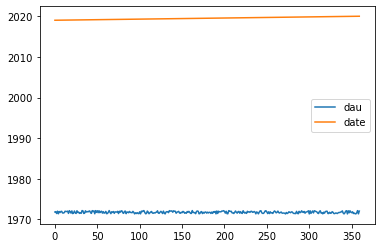

In [5]:
df.plot()

In [6]:
# Make an updateable plot structure
xas_widget = Dropdown(
    options=list(df.columns),
    description='x-axis',
    value=df.columns[0]
)
yas_widget = Dropdown(
    options=list(df.columns),
    description='y-axis',
    value=df.columns[1]
)
color_widget = Dropdown(
    options=list(df.columns),
    description='coloring',
    value=df.columns[1]
)

def update_plot(**kwargs):
    f, ax = plt.subplots()
    plt.ion()
    xas = xas_widget.value
    yas = yas_widget.value
    coloring = color_widget.value
    scatter_plot_color(
        f,
        ax,
        df,
        xas,
        yas,
        coloring,
    )
    
interactive(
    update_plot,
    xas=xas_widget,
    yas=yas_widget,
    coloring=color_widget
)

interactive(children=(Dropdown(description='x-axis', options=('dau', 'date'), value='dau'), Dropdown(descripti…